**Redback Operations Project: Football Sports Performance Analysis (2022-2023)**

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = "2022-2023 Football Team Stats.xlsx" 
df = pd.read_excel(file_path, header=1)

**Data Overview**

Let's begin by examining the structure of the dataset:

In [35]:
# Display the first few rows of the dataset
print(df.head())

   Rk            Squad Country  LgRk  MP   W  D  L  GF  GA  GD  Pts  Pts/MP  \
0   1        Barcelona     ESP     1  29  23  4  2  53   9  44   73    2.52   
1   2           Napoli     ITA     1  30  24  3  3  66  21  45   75    2.50   
2   3        Paris S-G     FRA     1  32  24  3  5  75  31  44   75    2.34   
3   4          Arsenal     ENG     1  32  23  6  3  77  34  43   75    2.34   
4   5  Manchester City     ENG     2  30  22  4  4  78  28  50   70    2.33   

     xG   xGA   xGD  xGD/90  Attendance          Top Team Scorer  \
0  55.9  22.7  33.2    1.14       83148  Robert Lewandowski - 17   
1  53.2  25.3  27.9    0.93       25662      Victor Osimhen - 21   
2  64.7  39.1  25.7    0.80       40508       Kylian Mbappé - 22   
3  64.1  34.7  29.4    0.92       60203          Martinelli - 15   
4  63.5  24.5  39.0    1.30       53203      Erling Haaland - 32   

              Goalkeeper  
0  Marc-André ter Stegen  
1             Alex Meret  
2   Gianluigi Donnarumma  
3       

In [36]:
# Display data types
df.dtypes

Rk                   int64
Squad               object
Country             object
LgRk                 int64
MP                   int64
W                    int64
D                    int64
L                    int64
GF                   int64
GA                   int64
GD                   int64
Pts                  int64
Pts/MP             float64
xG                 float64
xGA                float64
xGD                float64
xGD/90             float64
Attendance           int64
Top Team Scorer     object
Goalkeeper          object
dtype: object

**Data Cleaning and Transformation**

Let's perform necessary data cleaning and transformations, including handling missing values and extracting relevant information:

In [37]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())



Missing values in the dataset:
Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/MP             0
xG                 0
xGA                0
xGD                0
xGD/90             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64


In [38]:
# Extracting numerical part from 'Top Team Scorer' column
df[['Top Scorer', 'Top Team Scorer Goals']] = df['Top Team Scorer'].str.extract(r'(.+?) - (\d+)')

# Convert 'Goals' column to numeric
df['Top Team Scorer Goals'] = pd.to_numeric(df['Top Team Scorer Goals'])

print(df.head())

   Rk            Squad Country  LgRk  MP   W  D  L  GF  GA  ...  Pts/MP    xG  \
0   1        Barcelona     ESP     1  29  23  4  2  53   9  ...    2.52  55.9   
1   2           Napoli     ITA     1  30  24  3  3  66  21  ...    2.50  53.2   
2   3        Paris S-G     FRA     1  32  24  3  5  75  31  ...    2.34  64.7   
3   4          Arsenal     ENG     1  32  23  6  3  77  34  ...    2.34  64.1   
4   5  Manchester City     ENG     2  30  22  4  4  78  28  ...    2.33  63.5   

    xGA   xGD  xGD/90  Attendance          Top Team Scorer  \
0  22.7  33.2    1.14       83148  Robert Lewandowski - 17   
1  25.3  27.9    0.93       25662      Victor Osimhen - 21   
2  39.1  25.7    0.80       40508       Kylian Mbappé - 22   
3  34.7  29.4    0.92       60203          Martinelli - 15   
4  24.5  39.0    1.30       53203      Erling Haaland - 32   

              Goalkeeper          Top Scorer Top Team Scorer Goals  
0  Marc-André ter Stegen  Robert Lewandowski                    17  
1 

In [39]:
# Dropping unnecessary columns
columns_to_drop = ['Top Team Scorer', 'Goalkeeper']
df = df.drop(columns=columns_to_drop)

# Display cleaned and transformed data
print("\nCleaned and Transformed Data:")
print(df.head())


Cleaned and Transformed Data:
   Rk            Squad Country  LgRk  MP   W  D  L  GF  GA  GD  Pts  Pts/MP  \
0   1        Barcelona     ESP     1  29  23  4  2  53   9  44   73    2.52   
1   2           Napoli     ITA     1  30  24  3  3  66  21  45   75    2.50   
2   3        Paris S-G     FRA     1  32  24  3  5  75  31  44   75    2.34   
3   4          Arsenal     ENG     1  32  23  6  3  77  34  43   75    2.34   
4   5  Manchester City     ENG     2  30  22  4  4  78  28  50   70    2.33   

     xG   xGA   xGD  xGD/90  Attendance          Top Scorer  \
0  55.9  22.7  33.2    1.14       83148  Robert Lewandowski   
1  53.2  25.3  27.9    0.93       25662      Victor Osimhen   
2  64.7  39.1  25.7    0.80       40508       Kylian Mbappé   
3  64.1  34.7  29.4    0.92       60203          Martinelli   
4  63.5  24.5  39.0    1.30       53203      Erling Haaland   

   Top Team Scorer Goals  
0                     17  
1                     21  
2                     22  
3      

**Summary Statistics**

Let's delve into the summary statistics to gain insights into the overall distribution of key metrics:



In [40]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
              Rk       LgRk         MP          W          D          L  \
count  98.000000  98.000000  98.000000  98.000000  98.000000  98.000000   
mean   49.500000  10.316327  30.265306  11.346939   7.571429  11.346939   
std    28.434134   5.706926   1.153668   5.097204   2.556576   4.626464   
min     1.000000   1.000000  28.000000   2.000000   3.000000   2.000000   
25%    25.250000   5.250000  29.000000   7.250000   6.000000   8.000000   
50%    49.500000  10.000000  30.000000  11.000000   7.500000  11.000000   
75%    73.750000  15.000000  31.000000  15.000000   9.000000  14.750000   
max    98.000000  20.000000  32.000000  24.000000  14.000000  24.000000   

              GF         GA         GD        Pts     Pts/MP         xG  \
count  98.000000  98.000000  98.000000  98.000000  98.000000  98.000000   
mean   41.255102  41.255102   0.000000  41.612245   1.377143  40.764286   
std    13.118266  11.295753  20.772206  14.303509   0.473136   9.578049   
min

**Team Distribution**

Let's explore the distribution of teams across different countries:

In [41]:
# Check unique values in categorical columns
print("\nUnique values in 'Country' column:")
print(df['Country'].unique())

# Explore team distribution
print("\nTeam distribution by country:")
print(df['Country'].value_counts())




Unique values in 'Country' column:
['ESP' 'ITA' 'FRA' 'ENG' 'GER']

Team distribution by country:
ESP    20
ITA    20
FRA    20
ENG    20
GER    18
Name: Country, dtype: int64


**Visualization: Top 10 Teams - Goals For and Against**

Bar Chart Illustrating Top Teams in Goals For and Goals Against

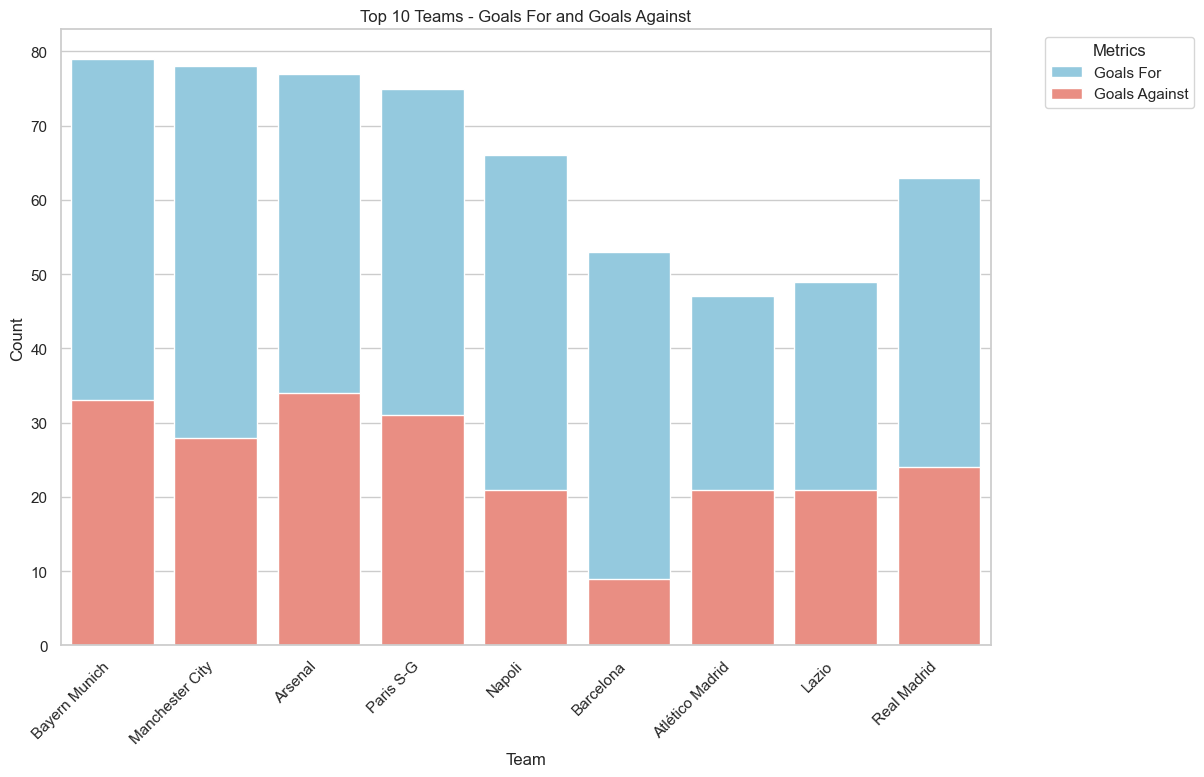

In [42]:
# Setting style for the plot
sns.set(style="whitegrid")

# Selecting top N teams based on 'Goals For'
top_n_gf = 5
top_teams_gf = df.nlargest(top_n_gf, 'GF')

# Selecting top N teams based on 'Goals Against'
top_n_ga = 5
top_teams_ga = df.nsmallest(top_n_ga, 'GA')

# Combining the top teams for both metrics
top_teams = pd.concat([top_teams_gf, top_teams_ga])

# Creating a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Squad', y='GF', data=top_teams, color='skyblue', label='Goals For')
sns.barplot(x='Squad', y='GA', data=top_teams, color='salmon', label='Goals Against')

# Set plot labels and title
plt.title(f'Top {top_n_gf + top_n_ga} Teams - Goals For and Goals Against')
plt.xlabel('Team')
plt.ylabel('Count')

# Show legend
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate team names for better readability
plt.xticks(rotation=45, ha='right')

plt.show()



This visualization presents a bar chart highlighting the top teams based on both Goals For and Goals Against, providing a comparative view of offensive and defensive strengths.

**Visualization: Expected Goals (xG) vs. Actual Goals (GF)**

Scatter Plot Depicting the Relationship between xG and GF.

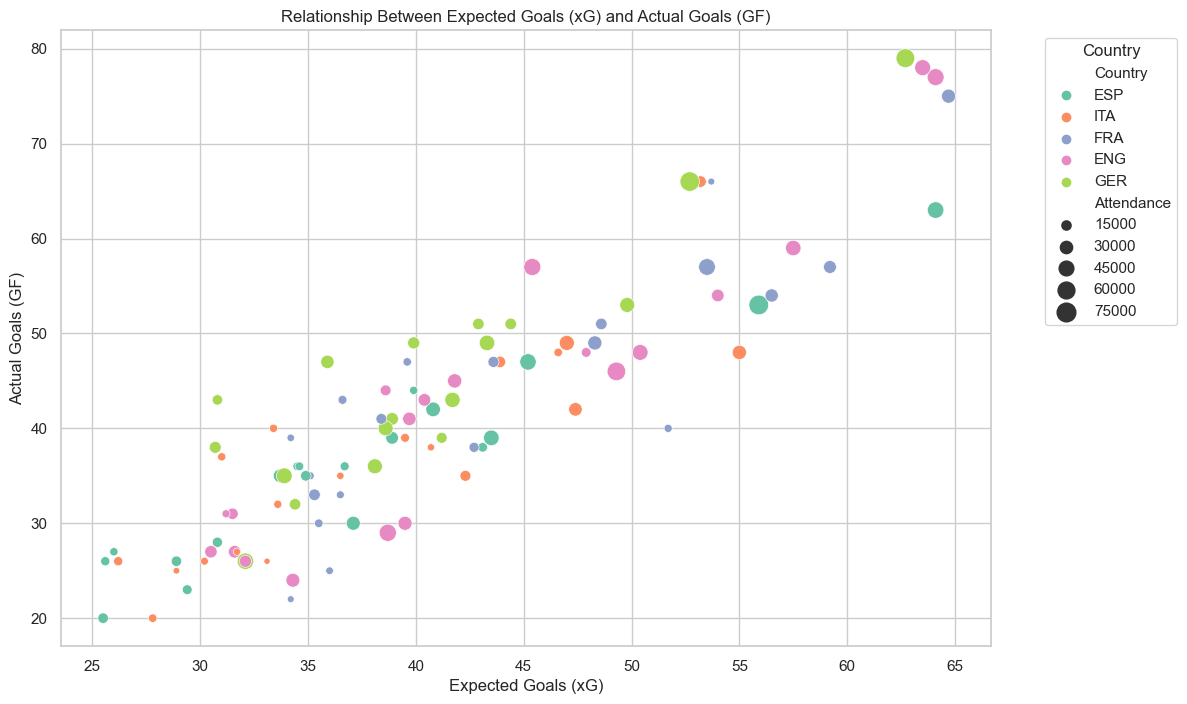

In [43]:
# Scatter Plot: Expected Goals (xG) vs. Actual Goals (GF)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='xG', y='GF', data=df, hue='Country', palette='Set2', size='Attendance', sizes=(20, 200))
plt.title('Relationship Between Expected Goals (xG) and Actual Goals (GF)')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Actual Goals (GF)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This scatter plot visualizes the relationship between Expected Goals (xG) and Actual Goals (GF), with points colored by country and sized by attendance, offering insights into the effectiveness of goal-scoring.

**Visualization: Distribution of Wins, Draws, and Losses**

Count Plot Illustrating the Distribution of Wins, Draws, and Losses

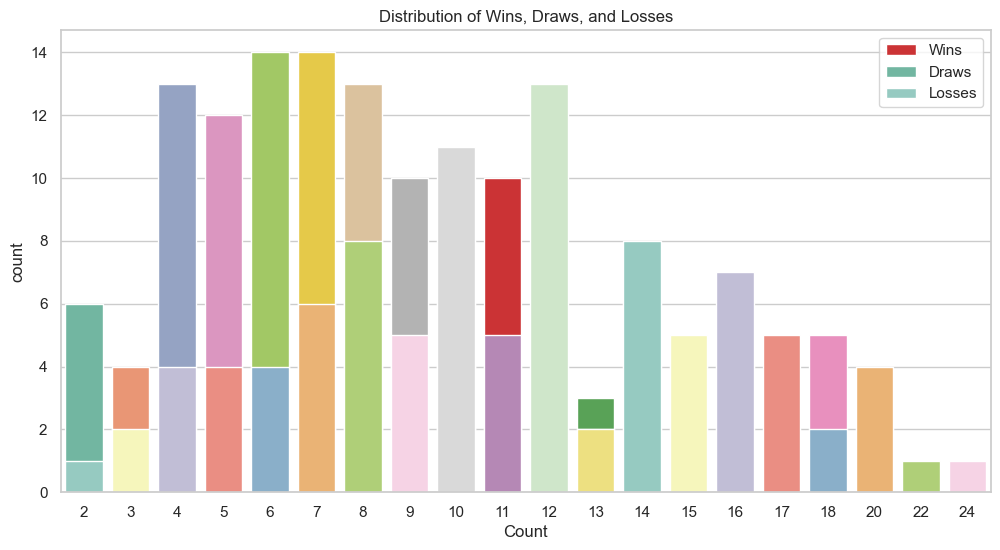

In [44]:
# Distribution of Wins, Draws, and Losses
plt.figure(figsize=(12, 6))
sns.countplot(x='W', data=df, palette='Set1', label='Wins')
sns.countplot(x='D', data=df, palette='Set2', label='Draws')
sns.countplot(x='L', data=df, palette='Set3', label='Losses')
plt.title('Distribution of Wins, Draws, and Losses')
plt.xlabel('Count')
plt.legend()
plt.show()

This count plot provides an overview of the distribution of Wins, Draws, and Losses across the teams, aiding in understanding the performance spectrum.

**Visualization: Top Scorers**

Bar Chart Displaying the Top 10 Scorers

**This plot displays the top 10 scorers and the number of goals they scored.**

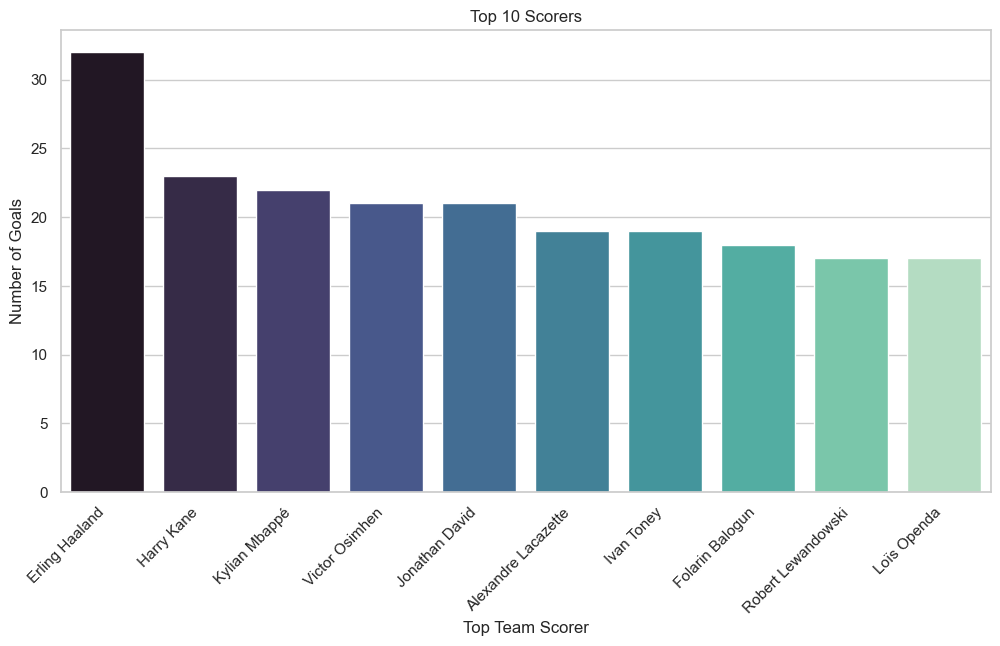

In [45]:
# Display top 10 scorers
top_scorers = df.nlargest(10, 'Top Team Scorer Goals')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Top Scorer', y='Top Team Scorer Goals', data=top_scorers, palette='mako')
plt.title('Top 10 Scorers')
plt.xlabel('Top Team Scorer')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45, ha='right')
plt.show()

This bar chart highlights the top 10 scorers based on the number of goals, providing a visual representation of individual player performances.

**Team Performance by Country**

Box Plot Illustrating Team Performance by Country

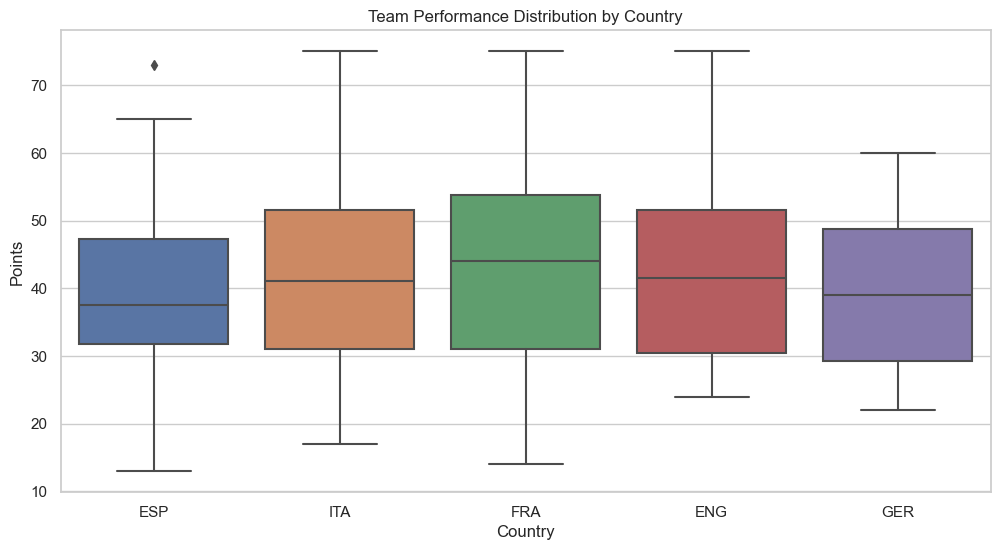

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Pts', data=df)
plt.title('Team Performance Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Points')
plt.show()



The box plot offers insights into the distribution of team performance in terms of points across different countries, allowing for a comparative analysis. The outlier represents the exceptional team performance from the country ESP.